## This code performs an analysis of lendingclubdata using Decision Tree and Random Forest. 
### The data is from lendingclub.com (2007-2010) downloaded from kaggle. 
### Variables are
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

#### not fully paid is our target variable i:e we want to know whether or not the borrower paid back their loan is predicted/classified correctly or not based on other variables. 


###### Import libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### Import data 

In [3]:
df = pd.read_csv("lendingclubdata.csv")

###### Preliminary data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


###### Some plots to explore the data

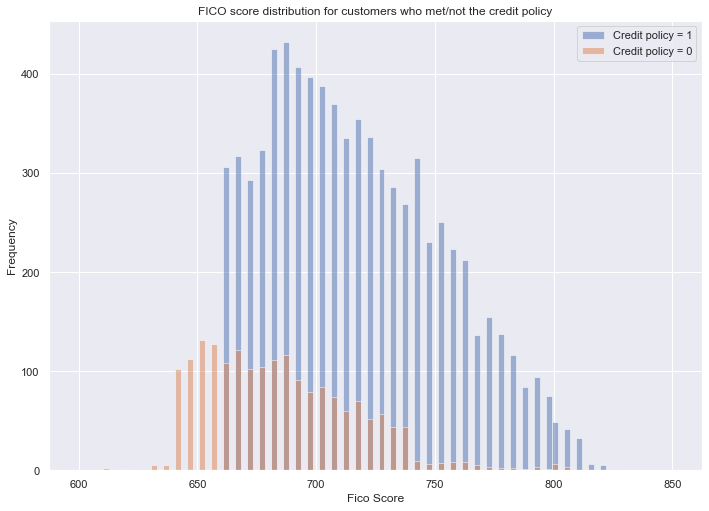

In [7]:
df1 = df.loc[df['credit.policy'] == 1]
df2 = df.loc[df['credit.policy'] == 0]
sns.set_style('whitegrid')

bins = np.linspace(600, 850, 100)
sns.set(rc={'figure.figsize':(11.7,8.27)}) #plt.figure(figsize=(11.7,8))
plt.hist(df1['fico'], bins, alpha=0.5, label='Credit policy = 1')
plt.hist(df2['fico'], bins, alpha=0.5, label='Credit policy = 0')
plt.legend(loc='upper right')
plt.xlabel("Fico Score")
plt.ylabel("Frequency")
plt.title('FICO score distribution for customers who met/not the credit policy')
plt.show()

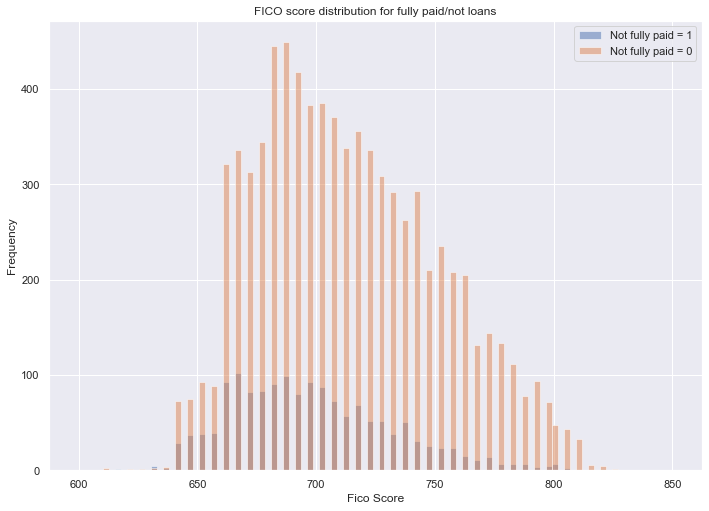

In [4]:

df1 = df.loc[df['not.fully.paid'] == 1]
df2 = df.loc[df['not.fully.paid'] == 0]
sns.set_style('whitegrid')

bins = np.linspace(600, 850, 100)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(df1['fico'], bins, alpha=0.5, label='Not fully paid = 1')
plt.hist(df2['fico'], bins, alpha=0.5, label='Not fully paid = 0')
plt.legend(loc='upper right')
plt.xlabel("Fico Score")
plt.ylabel("Frequency")
plt.title('FICO score distribution for fully paid/not loans')
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Loan counts by purpose')

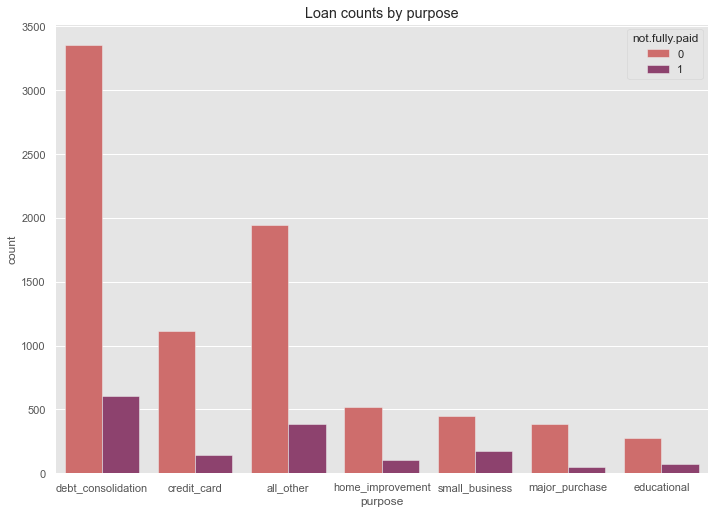

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('ggplot')
sns.countplot(df['purpose'],hue=df['not.fully.paid'],palette='flare')
plt.title('Loan counts by purpose')

Text(0.5, 1.0, 'FICO v Interest rates')

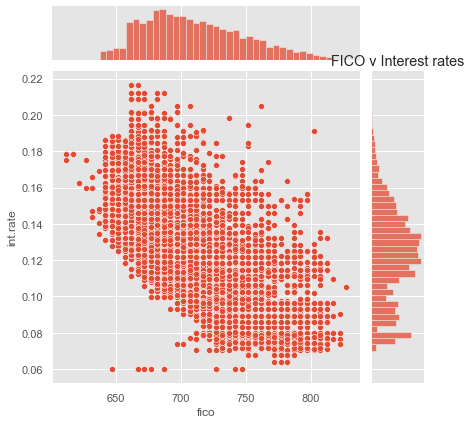

In [23]:
plt.style.use('ggplot')
sns.jointplot(data=df, x="fico", y="int.rate")
plt.title('FICO v Interest rates')

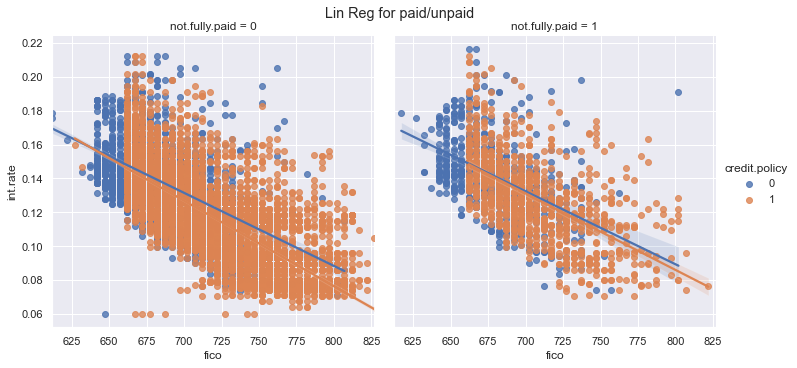

In [8]:
g = sns.lmplot(data=df,x='fico',y='int.rate',col='not.fully.paid',
           hue='credit.policy')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Lin Reg for paid/unpaid');

###### Setting up the data for modeling 

In [9]:
purposedummy = ['purpose']
dffinal = pd.get_dummies(df,columns=purposedummy,drop_first=True)

In [10]:
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

###### Split the dataset into train and test set 

In [11]:

from sklearn.model_selection import train_test_split
x = dffinal.drop('not.fully.paid',axis=1)
y = dffinal['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30)

###### Decision tree model 

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

###### Predictions

In [13]:
predictions = dtree.predict(X_test)

In [14]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

###### Generate reports 

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2409
           1       0.20      0.21      0.20       465

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874

[[2011  398]
 [ 368   97]]


###### Random Forest model

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) # play with 100...
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
rfc.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
predictionsrf = rfc.predict(X_test)  

In [19]:
predictionsrf

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
print(confusion_matrix(y_test,predictionsrf))
print(classification_report(y_test,predictionsrf))

[[2391   18]
 [ 453   12]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2409
           1       0.40      0.03      0.05       465

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.48      2874
weighted avg       0.77      0.84      0.77      2874



###### We can clearly see that the RF model performs better than the decision tree model 